<a href="https://colab.research.google.com/github/ankur04052000/My-git-hub/blob/main/Ankur_Collab(Mobile_prediction_demand).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this project I have tried to predict the mobile price range by using different types of classification algorithems ,with the help of other features (given in the data set).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/mobile price prediction demand/data_mobile_price_range.csv")


In [ ]:
#To display all the rows and columns of the given data set
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


 **Displaying our target feature**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


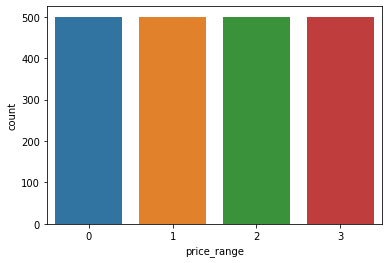

In [ ]:
sns.countplot(df['price_range'])

All the price ranges(1,2,3,4) has 500 rows that means there is no imbalanced dataset 

**4 is the maximum price while 1 is the minimum price**

In [ ]:
df.shape

(2000, 21)

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**No null values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Some visualisations 

*price range vs ram*

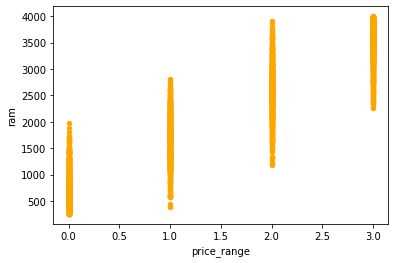

In [ ]:
df.plot(x='price_range',y='ram',kind='scatter',color="orange")

**For more ram ,you have to spend more money**

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


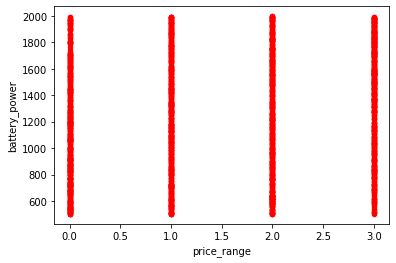

In [ ]:
df.plot(x='price_range',y='battery_power',kind='scatter',color="red")

**Battery power is constant irrespective of the price range**

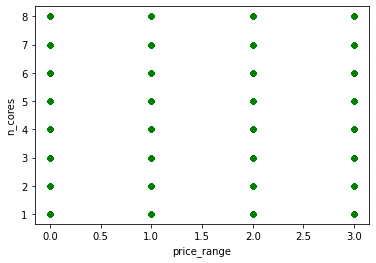

In [ ]:
df.plot(x='price_range',y='n_cores',kind='scatter',color="green")

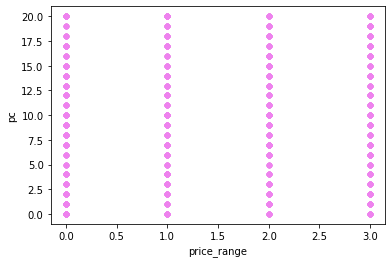

In [ ]:
df.plot(x='price_range',y='pc',kind='scatter',color="violet")

# Checking the correlation

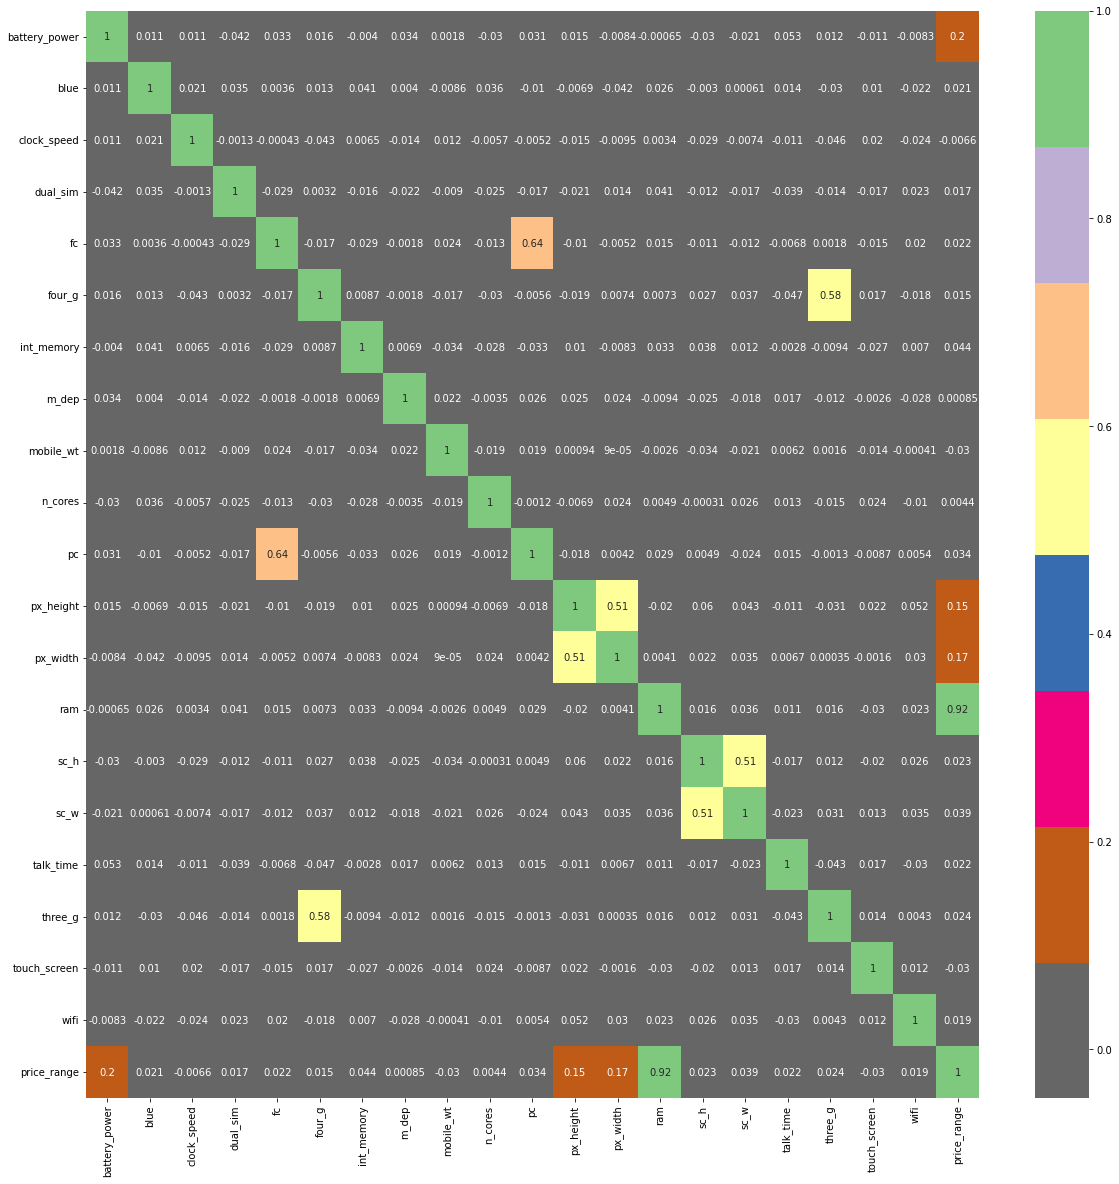

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

**All the features are almost important,so we will not exclude any features**

# Checking the outliers

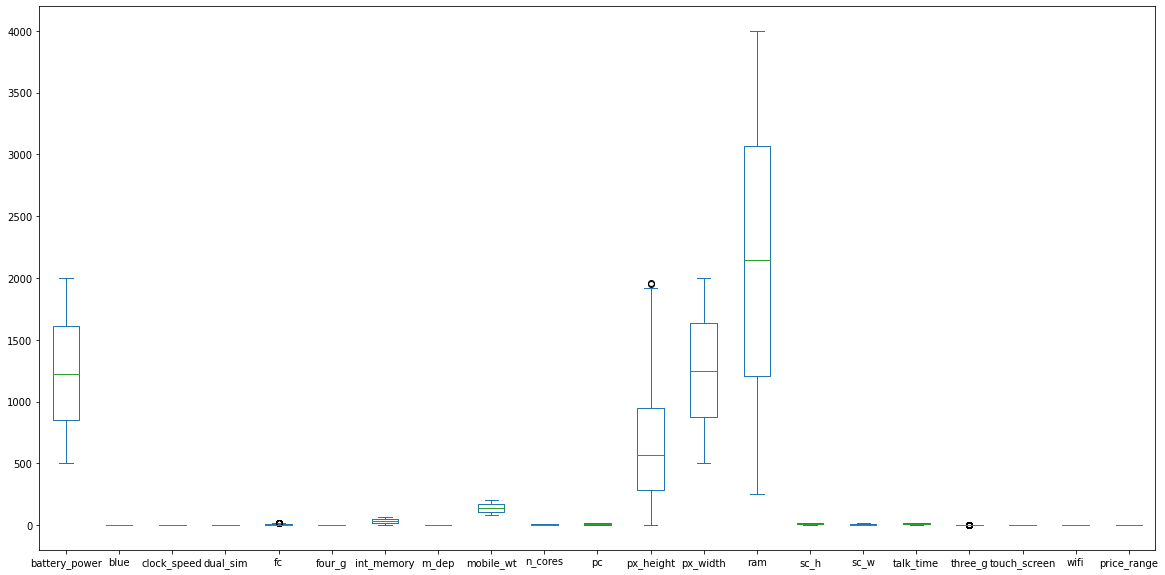

In [ ]:
df.plot(kind='box',figsize=(20,10))

# Splitting the data set into independent and dependent features

In [ ]:
x=df.drop('price_range',axis=1)
y=df['price_range']

**Splitting the data set into training and testing data set for applying model features**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=100)



In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[ 0.7256452 , -0.98565839,  1.07628086, ...,  0.5508206 ,
         0.98675438, -1.00445437],
       [-0.37846415, -0.98565839,  1.19901165, ..., -1.81547314,
        -1.01342342, -1.00445437],
       [ 0.24047189, -0.98565839,  0.58535769, ...,  0.5508206 ,
        -1.01342342, -1.00445437],
       ...,
       [-1.3465436 ,  1.01455029, -0.15102706, ...,  0.5508206 ,
         0.98675438, -1.00445437],
       [ 0.91608706, -0.98565839, -0.15102706, ...,  0.5508206 ,
        -1.01342342,  0.99556539],
       [ 0.19739576,  1.01455029,  0.33989611, ...,  0.5508206 ,
         0.98675438,  0.99556539]])

In [ ]:
x_test

array([[-0.36712832,  1.01455029,  1.19901165, ..., -1.81547314,
        -1.01342342,  0.99556539],
       [-0.5757075 ,  1.01455029, -1.0101426 , ...,  0.5508206 ,
        -1.01342342,  0.99556539],
       [ 1.0815901 ,  1.01455029, -1.0101426 , ..., -1.81547314,
        -1.01342342, -1.00445437],
       ...,
       [-0.07919837, -0.98565839,  1.68993482, ...,  0.5508206 ,
        -1.01342342, -1.00445437],
       [-1.19917787,  1.01455029, -1.25560419, ..., -1.81547314,
         0.98675438,  0.99556539],
       [-1.4372302 , -0.98565839, -1.25560419, ...,  0.5508206 ,
         0.98675438,  0.99556539]])

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred=dtc.predict(x_test)

In [ ]:
pred

array([0, 2, 1, 3, 2, 3, 3, 2, 3, 0, 0, 2, 3, 3, 0, 2, 2, 2, 2, 0, 0, 3,
       1, 0, 0, 1, 3, 0, 1, 2, 0, 3, 0, 1, 0, 2, 2, 1, 1, 3, 3, 3, 0, 0,
       3, 3, 2, 0, 1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 1, 0, 3, 2, 3, 0, 3, 0,
       0, 3, 3, 1, 0, 1, 2, 0, 1, 3, 0, 3, 2, 3, 1, 0, 2, 0, 1, 2, 1, 2,
       3, 2, 2, 3, 3, 2, 0, 3, 3, 1, 1, 1, 0, 0, 2, 3, 2, 0, 0, 1, 0, 1,
       0, 1, 3, 2, 0, 3, 1, 2, 0, 1, 2, 1, 0, 1, 3, 3, 3, 2, 0, 3, 1, 1,
       1, 2, 3, 1, 3, 2, 0, 0, 3, 0, 2, 3, 1, 2, 2, 2, 0, 2, 0, 3, 1, 2,
       1, 0, 2, 3, 1, 1, 3, 3, 3, 0, 1, 3, 0, 3, 2, 0, 3, 1, 2, 1, 2, 2,
       2, 1, 3, 0, 0, 2, 1, 0, 0, 3, 2, 2, 3, 2, 2, 1, 2, 1, 2, 2, 3, 1,
       2, 1])

**Finding confusion matrix and accuracy score(DTC)**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
dtc_acc_score=accuracy_score(pred,y_test)
dtc_conf=confusion_matrix(pred,y_test)

In [ ]:
print(dtc_acc_score)
print(dtc_conf)

0.82
[[44  4  0  0]
 [ 4 34  7  0]
 [ 0  6 37  9]
 [ 0  0  6 49]]


**Support vector classifier**

In [ ]:
from sklearn.svm import SVC
knn=SVC()
knn.fit(x_train,y_train)


SVC()

In [ ]:
pred_1=knn.predict(x_test)
pred_1

array([0, 1, 1, 3, 2, 3, 3, 2, 3, 0, 0, 2, 3, 3, 0, 2, 2, 3, 2, 0, 0, 3,
       1, 1, 0, 1, 3, 0, 1, 2, 0, 3, 0, 1, 0, 3, 3, 2, 1, 3, 3, 3, 0, 0,
       3, 3, 2, 0, 1, 2, 3, 2, 3, 1, 1, 3, 1, 3, 1, 0, 3, 2, 2, 0, 2, 0,
       0, 3, 3, 2, 0, 1, 2, 1, 2, 3, 0, 3, 2, 3, 1, 0, 2, 0, 2, 2, 2, 2,
       3, 3, 2, 3, 3, 2, 0, 2, 3, 0, 1, 1, 0, 0, 2, 3, 2, 1, 0, 1, 1, 1,
       1, 1, 3, 2, 0, 3, 1, 2, 0, 1, 2, 1, 0, 2, 3, 2, 3, 2, 0, 2, 1, 0,
       1, 2, 3, 0, 3, 2, 0, 0, 3, 0, 2, 3, 2, 2, 2, 2, 0, 1, 0, 3, 1, 2,
       1, 0, 2, 3, 1, 1, 3, 2, 3, 0, 0, 3, 0, 2, 3, 0, 2, 1, 2, 1, 1, 1,
       2, 1, 3, 1, 0, 2, 1, 1, 0, 3, 2, 2, 3, 2, 2, 1, 2, 1, 2, 3, 3, 1,
       1, 1])

**Finding confusion matrix and accuracy score(SVC)**

In [ ]:
svc_accuracy_score=accuracy_score(pred_1,y_test)
svc_conf=confusion_matrix(pred_1,y_test)
print(svc_accuracy_score)
print(svc_conf)

0.845
[[41  4  0  0]
 [ 7 34  6  0]
 [ 0  6 43  7]
 [ 0  0  1 51]]


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred_2=lr.predict(x_test)
pred_2

array([0, 2, 1, 3, 2, 3, 3, 2, 3, 0, 0, 2, 3, 3, 0, 2, 2, 3, 2, 0, 0, 3,
       1, 0, 0, 1, 3, 0, 2, 2, 0, 3, 0, 1, 0, 3, 3, 2, 1, 3, 3, 3, 0, 0,
       3, 3, 2, 0, 1, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 0, 3, 2, 3, 0, 2, 0,
       0, 3, 3, 2, 0, 0, 2, 0, 2, 3, 0, 3, 2, 3, 1, 0, 2, 0, 2, 2, 1, 2,
       3, 3, 2, 3, 3, 2, 0, 2, 3, 1, 2, 1, 0, 0, 3, 3, 2, 0, 0, 1, 0, 1,
       1, 1, 3, 2, 0, 3, 1, 3, 1, 1, 3, 1, 0, 1, 3, 2, 3, 2, 0, 3, 2, 0,
       1, 2, 3, 1, 3, 2, 0, 1, 3, 0, 2, 3, 1, 2, 2, 2, 0, 1, 0, 3, 2, 2,
       1, 0, 2, 3, 1, 1, 3, 2, 3, 0, 0, 3, 0, 2, 3, 0, 2, 0, 2, 1, 1, 2,
       2, 1, 3, 1, 0, 2, 1, 0, 0, 3, 2, 2, 3, 2, 2, 1, 2, 1, 2, 2, 3, 1,
       1, 1])

In [ ]:
lr_accuracy_score=accuracy_score(pred_2,y_test)
lr_conf=confusion_matrix(pred_2,y_test)
print(lr_accuracy_score)
print(lr_conf)

0.96
[[48  0  0  0]
 [ 0 39  1  0]
 [ 0  5 49  2]
 [ 0  0  0 56]]


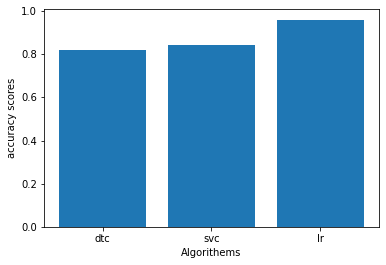

In [ ]:
plt.bar(x=['dtc','svc','lr'],height=[dtc_acc_score,svc_accuracy_score,lr_accuracy_score])
plt.xlabel("Algorithems")
plt.ylabel("accuracy scores")
plt.show()

**Logistic Regression has the highest accuracy score**

# Summary

1)First I checked whether my given data set is balanced or not in terms of mobile price range.

2)Then I found out the shape of my data set and counted whether my data set contains any null values or not.

3)After that using matplotlib library ,I plotted some graphs ,keeping price range as common and changing the other variable .(Data visualisation).

4)Checked the correlation.

5)Found whether my data set contains any outliers or not.

6)found x train and x test using standard scaler function

7)Using decision tree classifier found out the accuracy score and confusion matrix.

8)Using support vector classifier found out the accuracy score and confusion matrix.

9)Using logistic regression classifier found out the accuracy score and confusion matrix.

8)plotted the bar chart to find out which classifier gives the highest accuracy score out of all these .

# Conclusion

At the end I concluded that my mobile price is not getting affected by other features except ram .After applying the classifaction algorithems , logistic regression classifier gave me the highest accuracy score (96 percent) whereas the other two gave almost same accuracy scores

# Git Hub link